<a href="https://colab.research.google.com/github/SenaKymk/naive_bayes_YZM212_lab/blob/main/naiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Algoritmasının Manuel Olarak Uygulanması

Bu notebook, **Scikit-Learn kütüphanesi kullanmadan** Gaussian Naive Bayes algoritmasını Python ile sıfırdan uygulamak için hazırlanmıştır.

📌 **Adımlar:**
1. **Naive Bayes Classı Algoritmasını Sıfırdan Yazma**
2. **Veri Setini Yükleme**
3. **Veriyi Eğitim ve Test Setlerine Ayırma**
4. **Modeli Eğitme ve Tahmin Yapma** 📊
5. **Modelin Performansını Değerlendirme** ✅
6. **Scikit-Learn ile Karşılaştırma** ⚖️



In [7]:
#gerekli kütüphaneler eklenir
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##  1. Gaussian Naive Bayes Algoritmasını Sıfırdan Yazma


**Temel prensibi:** **Her özelliğin (feature) bağımsız olduğu varsayılır** ve **Bayes Teoremi** kullanılarak olasılık hesaplamaları yapılır.  

Bu adımda, **kendi Naive Bayes sınıfımızı (class) yazıyoruz**.  

1. **Modeli eğitirken:** Her sınıf için **ortalama (mean), standart sapma (std) ve öncelik olasılığı (prior probability)** hesaplanır.
2. **Tahmin yaparken:** Verilen bir girişin **her sınıfa ait olma olasılığı** hesaplanır ve en yüksek olasılığa sahip sınıf tahmin edilir.


In [12]:
class MyGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.stds = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis=0)
            self.stds[c] = np.std(X_c, axis=0) + 1e-6  # Bölme hatasını önlemek için epsilon ekliyoruz
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self._pdf(c, x)))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self.means[class_idx]
        std = self.stds[class_idx]
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))



## 2. Veri Setini Yükleme ve Hazırlama

Bu adımda, önceden temizlenmiş **"diabetes_veri_temiz.csv"** dosyasını yüklüyoruz.  
Bu veri seti, **diyabet hastalığını tahmin etmek için** çeşitli sağlık ölçümlerini içermektedir.  
Hedef değişkenimiz **"Outcome"** olup, **1 = Diyabet var, 0 = Diyabet yok** olarak kodlanmıştır.


In [13]:
# Veriyi yükle
df = pd.read_csv("/content/diabetes_veri_temiz.csv")
X = df.drop(columns=["Outcome"]).to_numpy()
y = df["Outcome"].to_numpy()


## 3. Veriyi Eğitim ve Test Setlerine Ayırma

Makine öğrenmesi modellerinde, veriyi **eğitim (train) ve test (test) seti** olarak bölmemiz gerekir.  
- **Eğitim seti (%80)**  Model bu verilerle öğrenir.  
- **Test seti (%20)**  Modelin performansını değerlendirmek için kullanılır.  

Bu bölme işlemini gerçekleştirmek için `train_test_split` fonksiyonunu kullanıyoruz.train_test_split rastgele sayılar atar ve her çalıştırmada farklı sonuçlar üretebilir. random_state belirli bir sabit değere ayarlandığında, her çalıştırmada aynı bölme işlemi yapılır ve aynı sonuçlar elde edilir.Bu yüzden randomstate kullanmamız önemli.


In [14]:
# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  4. Modeli Eğitme ve Test Etme

Bu adımda, **kendi yazdığımız Naive Bayes modelini eğitiyoruz** ve test verisi üzerinde tahminler yapıyoruz.


In [15]:
# Kendi modelimizi oluştur ve eğit
nb = MyGaussianNB()
start_time = time.time()
nb.fit(X_train, y_train)
train_time_custom = time.time() - start_time

In [16]:
# Tahmin yap
start_time = time.time()
y_pred_custom = nb.predict(X_test)
test_time_custom = time.time() - start_time

##  5. Modelin Performansını Değerlendirme

Modelin başarısını ölçmek için:
- **Karmaşıklık matrisi (confusion matrix)**
- **Doğruluk, hassasiyet, duyarlılık gibi metrikler**
hesaplanacaktır.



Özel Naive Bayes - Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



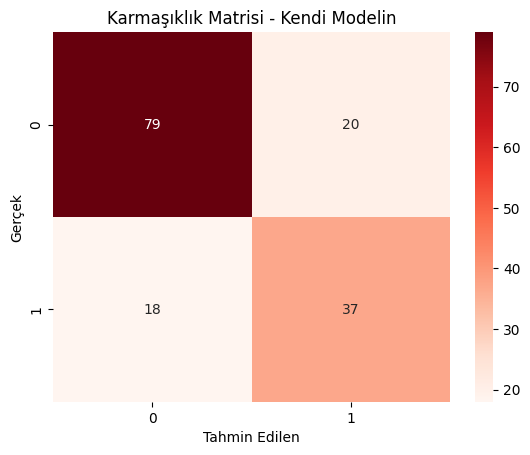

Özel Naive Bayes - Eğitim Süresi: 0.0015 saniye
Özel Naive Bayes - Test Süresi: 0.0144 saniye


In [17]:
# Performans değerlendirme
print("\nÖzel Naive Bayes - Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_custom))

sns.heatmap(confusion_matrix(y_test, y_pred_custom), annot=True, fmt="d", cmap="Reds")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Karmaşıklık Matrisi - Kendi Modelin")
plt.show()

print(f"Özel Naive Bayes - Eğitim Süresi: {train_time_custom:.4f} saniye")
print(f"Özel Naive Bayes - Test Süresi: {test_time_custom:.4f} saniye")